# 4차 HW: 202340338 이준혁

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from IPython.display import Math

# 1 - (a)

In [2]:
def ARMA_11(p0,p1,t1,ss,n): #AR1, MA1포함
    L = []
    w = np.random.normal(0,ss**0.5,n+1)
    x0 = 0
    for t in range(1,n+1):
        xt = p0+p1*x0+w[t]+t1*w[t-1]
        L.append(xt)
        x0 = xt
    return L

In [3]:
Ar1 = ARMA_11(1,0.6,0,1,500)

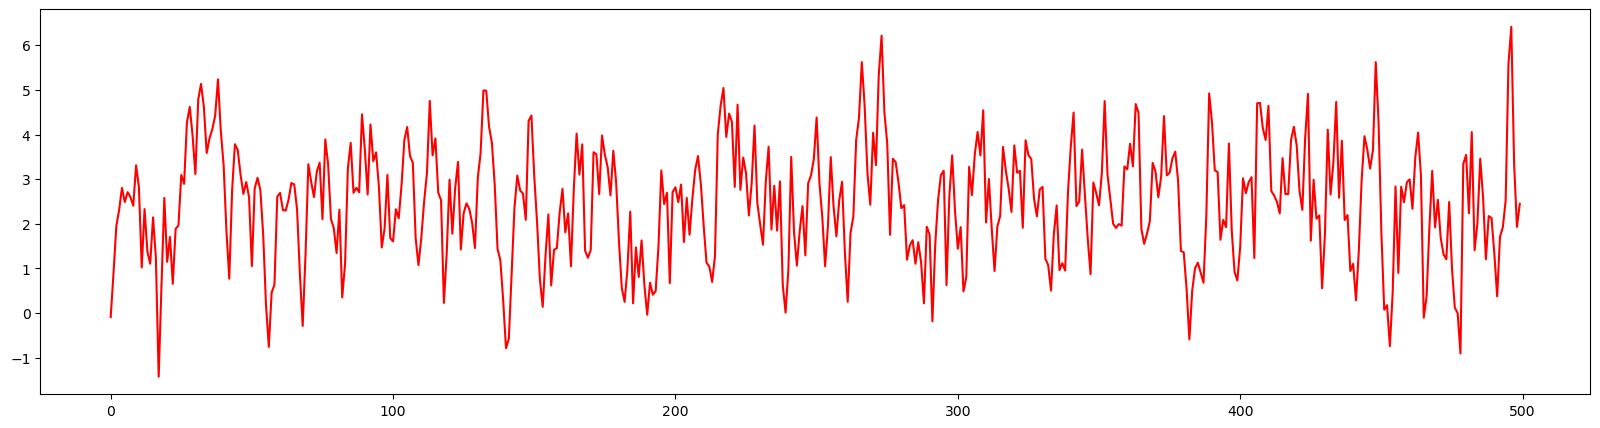

In [4]:
plt.figure(figsize=(20,5))
plt.plot(Ar1, color = 'r')
plt.show()

In [5]:
def yw_ar_1(D):
    n = len(D)
    X = np.array(D)-np.mean(D)
    hat_p1 = sm.tsa.stattools.acf(X)[1]
    hat_p0 = np.mean(D)*(1-hat_p1)
    return hat_p0, hat_p1

In [6]:
def ERROR_one_step_forecast_yw1(D,m):
    T = len(D)
    n = T - m
    Lr,Lf,Le = [],[],[]
    for i in range(m):
        INS = D[i:i+n]
        Real_one = D[i+n]
        mu = np.mean(INS)
        yw = yw_ar_1(INS)
        Xt = INS[-1]
        Fore_one = mu + yw[1]*(Xt-mu)
        Lr.append(Real_one)
        Lf.append(Fore_one)
        Le.append(Real_one - Fore_one)
    Le = np.array(Le)
    MAE = np.mean(np.abs(Le))
    RMSE = (np.mean(Le**2))**0.5
    plt.figure(figsize=(20,5))
    plt.plot(Lr, 'r', label = "Real value", marker = 'o')
    plt.plot(Lf, 'b', label = "Forecast", marker = '+')
    plt.legend()
    plt.show()
    return MAE, RMSE

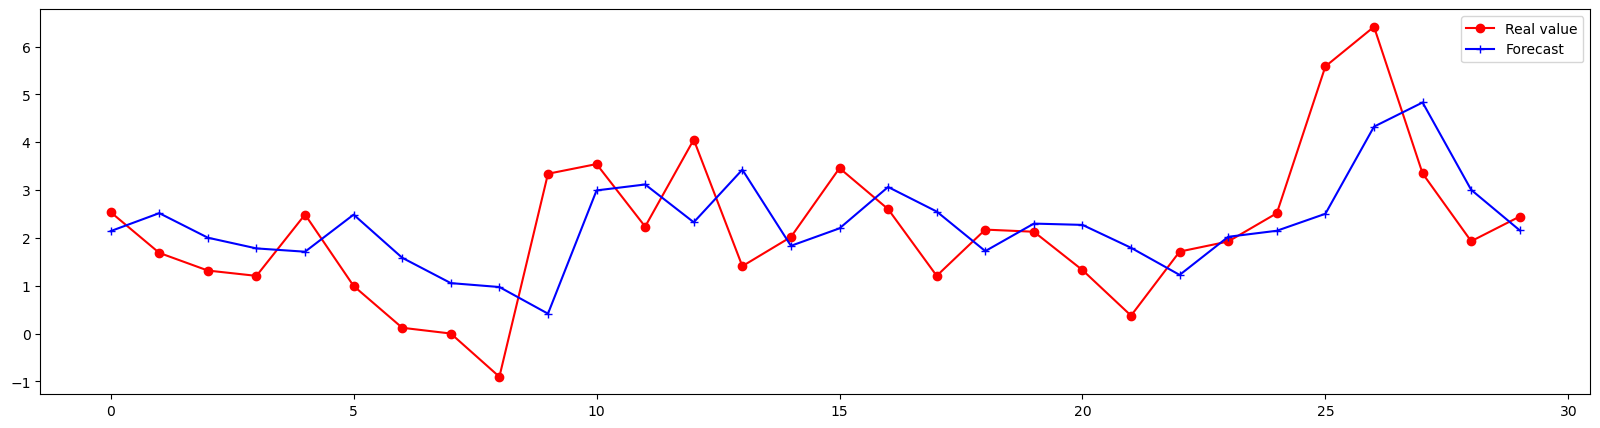

MAE: 1.0815821077869143, RMSE: 1.3212244105126882


In [7]:
MAE, RMSE = ERROR_one_step_forecast_yw1(Ar1,30)
print(f"MAE: {MAE}, RMSE: {RMSE}")

#  1- (b)

In [8]:
def yw_ar_2(D):
    n = len(D)
    X = np.array(D)-np.mean(D)
    rho = sm.tsa.stattools.acf(X)
    B = np.zeros((2,1))
    A = np.zeros((2,2))
    for i in range(2):
        B[i][0] = rho[i+1]
        for j in range(2):
            A[i][j] = rho[i-j]
    A_inv = np.linalg.inv(np.array(A))
    B = np.array(B)
    phi = np.dot(A_inv, B)
    p1,p2 = phi
    p0 = np.mean(D)*(1-p1-p2)
    return p0,p1,p2

In [9]:
def ERROR_one_step_forecast_yw2(D,m):
    T = len(D)
    n = T - m
    Lr,Lf,Le = [],[],[]
    for i in range(m):
        INS = D[i:i+n]
        Real_one = D[i+n]
        mu = np.mean(INS)
        yw = yw_ar_2(INS)
        Xt = INS[-1]
        Xt1 = INS[-2]
        Fore_one = yw[0]+yw[1]*Xt+yw[2]*Xt1
        Lr.append(Real_one)
        Lf.append(Fore_one)
        Le.append(Real_one - Fore_one)
    Le = np.array(Le)
    MAE = np.mean(np.abs(Le))
    RMSE = (np.mean(Le**2))**0.5
    plt.figure(figsize=(20,5))
    plt.plot(Lr, 'r', label = "Real value", marker = 'o')
    plt.plot(Lf, 'b', label = "Forecast", marker = '+')
    plt.legend()
    plt.show()
    return MAE, RMSE

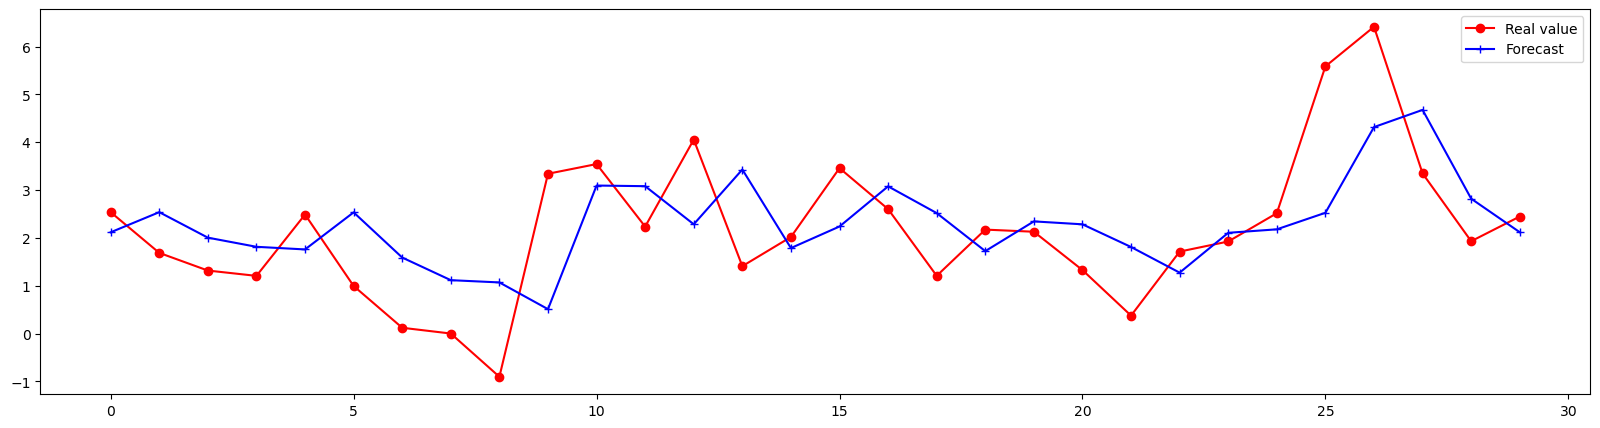

MAE: 1.0753058116310332, RMSE:1.3106999789560998


In [10]:
MAE, RMSE = ERROR_one_step_forecast_yw2(Ar1,30)
print(f"MAE: {MAE}, RMSE:{RMSE}")

# 2-(a)

In [11]:
def ARMA_22(p0,p1,p2,t1,t2,ss,n):
    L = []
    w = np.random.normal(0,ss**0.5,n+2)
    x00,x0 = 0,0
    for t in range(1,n+1):
        xt = p0+p1*x0+p2*x00+w[t]+t1*w[t-1]+t2*w[t-2]
        L.append(xt)
        x00 = x0
        x0 = xt
    return L

In [12]:
Ar2 = ARMA_22(1,0.7,-0.2,0,0,1,500)

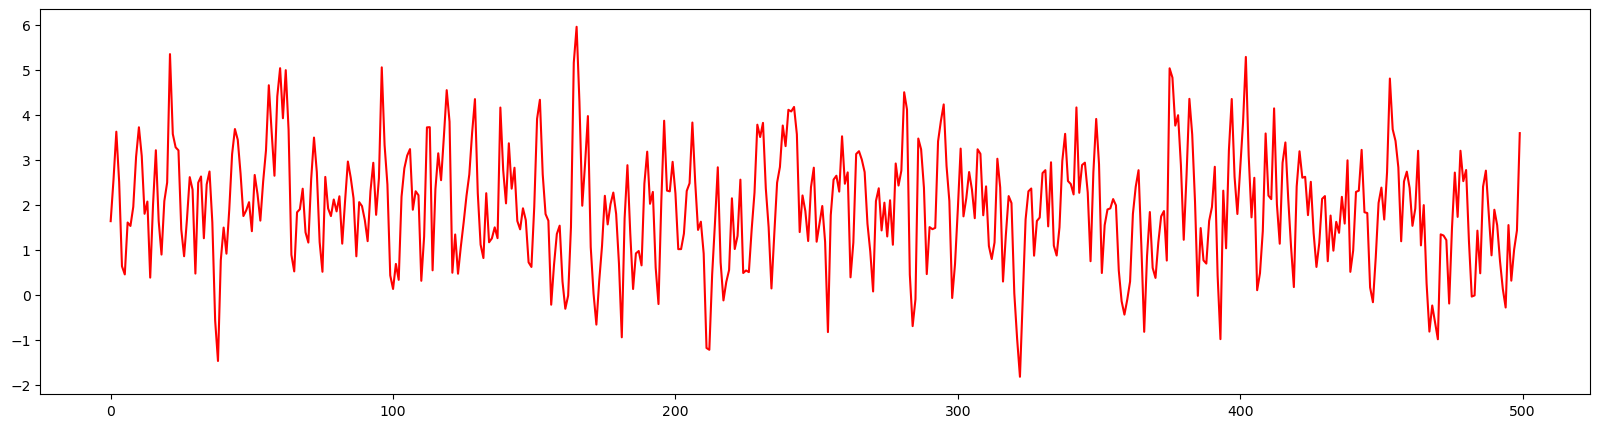

In [13]:
plt.figure(figsize=(20,5))
plt.plot(Ar2, color = 'r')
plt.show()

In [14]:
def olse_ar_2(D):
    n = len(D)
    X = np.array(D)-np.mean(D)
    Z,xx = [],[]
    for t in range(2,n):
        zt = [X[t-1],X[t-2]]
        Z.append(zt)
        xx.append(X[t])
    Z = np.array(Z)
    xx = np.array(xx)
    f = np.dot(Z.T,Z)
    s = np.dot(Z.T,xx)
    olse = np.dot(np.linalg.inv(f),s)
    p1,p2 = olse
    p0 = np.mean(D)-(1-p1-p2)
    return p0,p1,p2

In [15]:
def ERROR_one_step_forecast_olse2(D,m):
    T = len(D)
    n = T - m
    Lr,Lf,Le = [],[],[]
    for i in range(m):
        INS = D[i:i+n]
        Real_one = D[i+n]
        mu = np.mean(INS)
        olse = olse_ar_2(INS)
        Xt = INS[-1]
        Xt1 = INS[-2]
        Fore_one = olse[0]+olse[1]*Xt+olse[2]*Xt1
        Lr.append(Real_one)
        Lf.append(Fore_one)
        Le.append(Real_one - Fore_one)
    Le = np.array(Le)
    MAE = np.mean(np.abs(Le))
    RMSE = (np.mean(Le**2))**0.5
    plt.figure(figsize=(20,5))
    plt.plot(Lr, 'r', label = "Real value", marker = 'o')
    plt.plot(Lf, 'b', label = "Forecast", marker = '+')
    plt.legend()
    plt.show()
    return MAE, RMSE

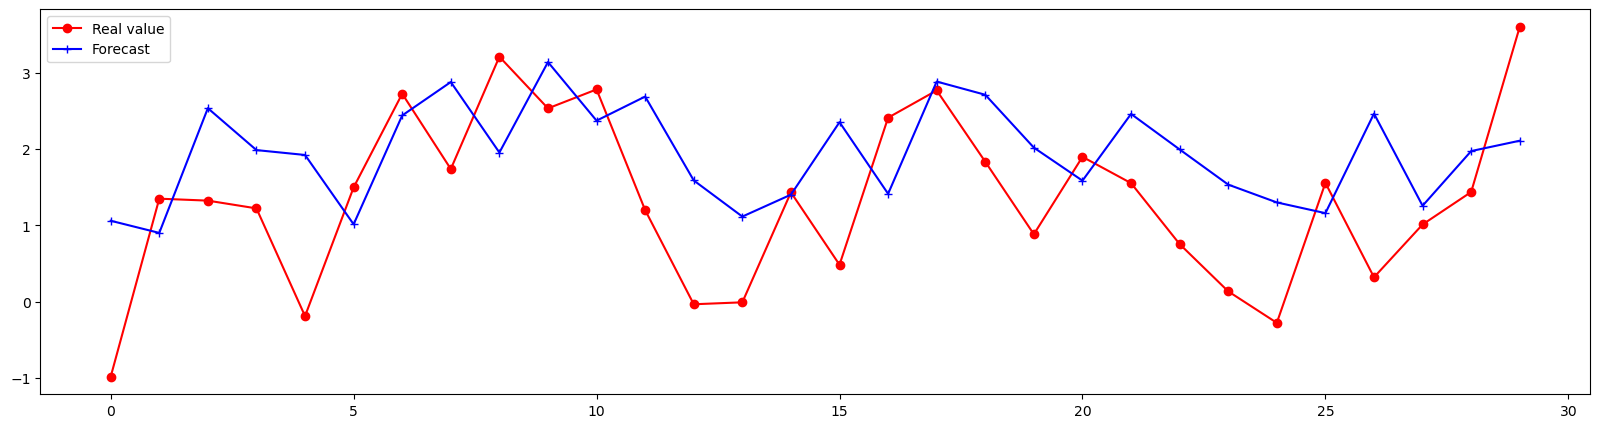

MAE: 1.0082401904011287, RMSE: 1.1755667809919914


In [16]:
MAE, RMSE = ERROR_one_step_forecast_olse2(Ar2,30)
print(f"MAE: {MAE}, RMSE: {RMSE}")

# 2-(b)

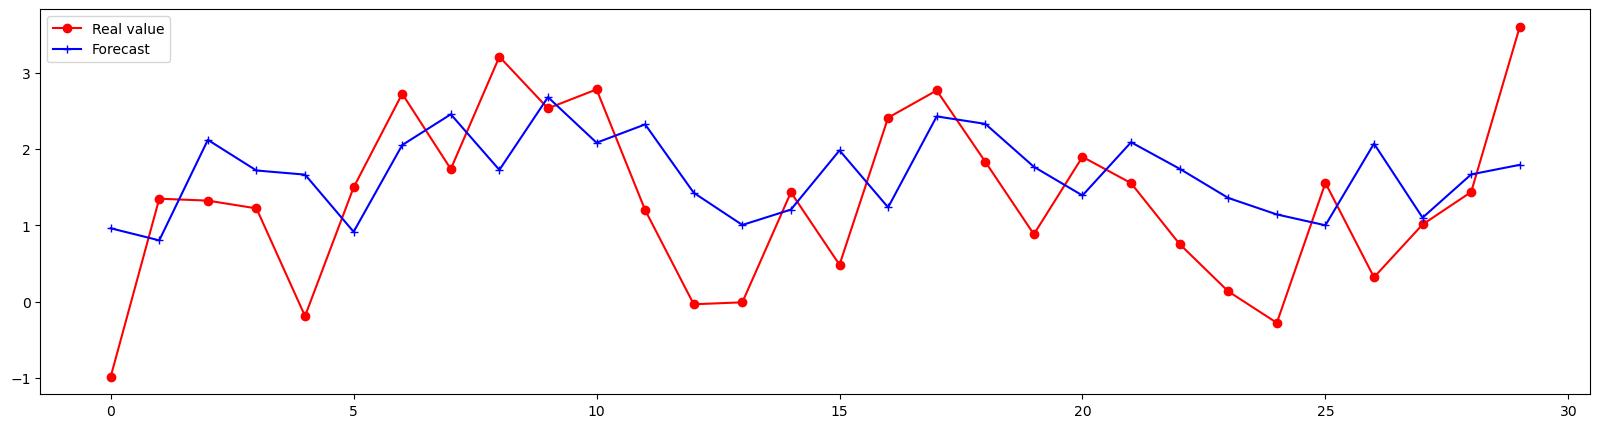

MAE: 0.9081258273940919, RMSE:1.0543613347131227


In [17]:
MAE, RMSE = ERROR_one_step_forecast_yw2(Ar2,30)
print(f"MAE: {MAE}, RMSE:{RMSE}")

# 2-(c)

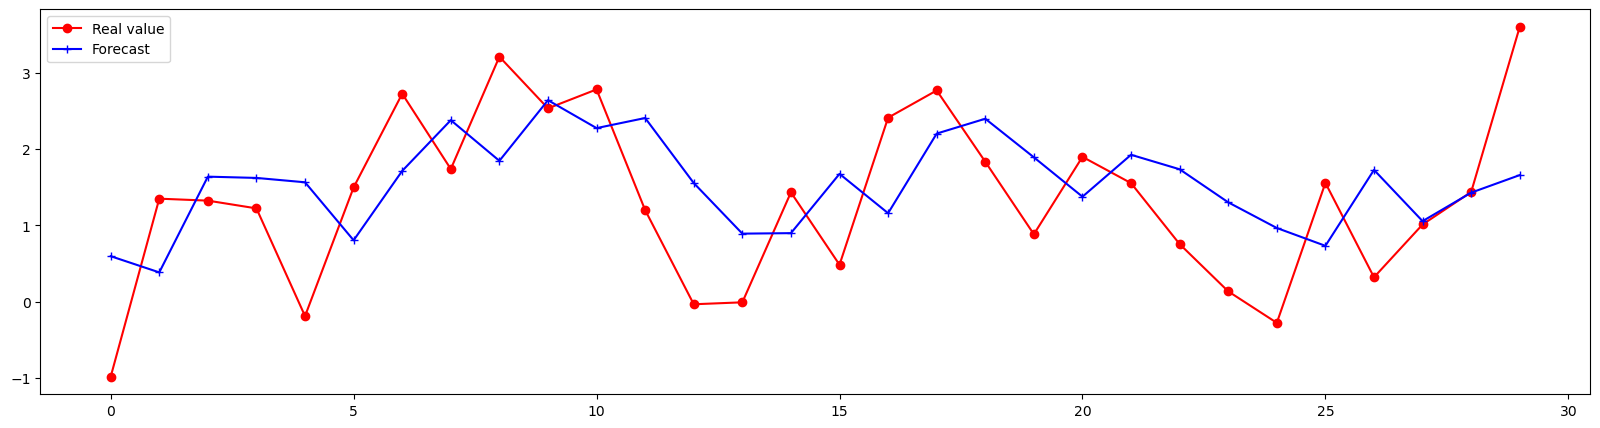

MAE: 0.8878405663391683, RMSE: 1.0195688435443446


In [18]:
MAE, RMSE = ERROR_one_step_forecast_yw1(Ar2,30)
print(f"MAE: {MAE}, RMSE: {RMSE}")

# 3-(a)

In [19]:
ma1 = ARMA_11(1,0,0.4,1,500)

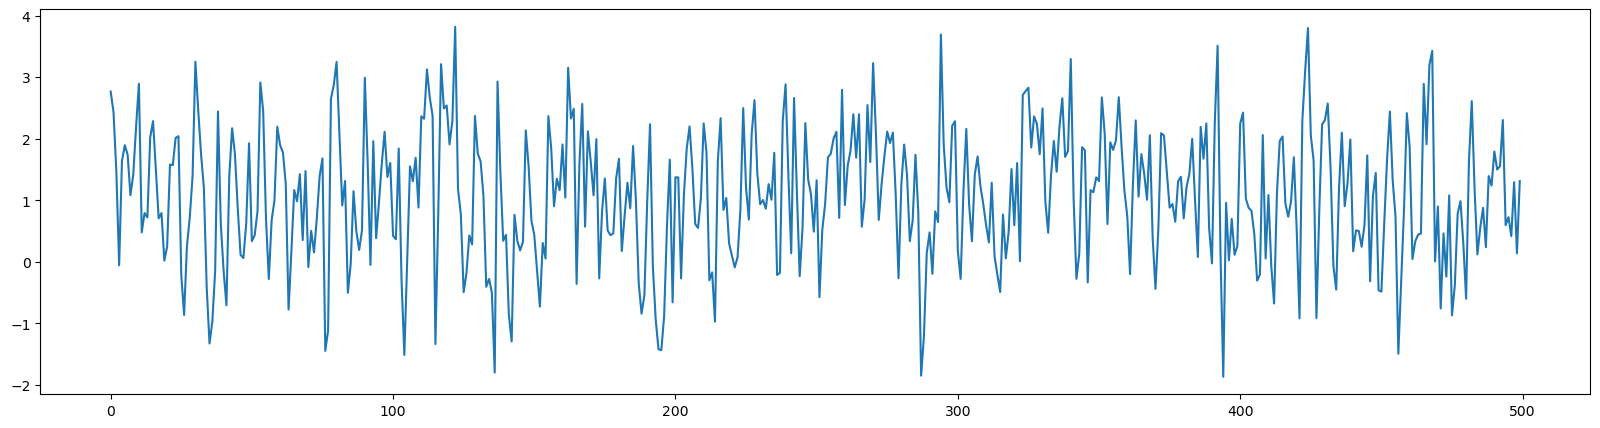

In [20]:
plt.figure(figsize=(20,5))
plt.plot(ma1)
plt.show()

In [21]:
def ma1_estimator(D):
    rho = sm.tsa.stattools.acf(D)
    if np.abs(rho[1]) < 0.5:
        hat_th_11 = (1+np.sqrt(1-4*rho[1]**2))/2/rho[1]
        hat_th_12 = (1-np.sqrt(1-4*rho[1]**2))/2/rho[1]
    else:
        print('DNE')
    return hat_th_11,hat_th_12

In [22]:
def ERROR_one_step_forecast_ma_est(D,m):
    T = len(D)
    n = T - m
    Lr,Lf,Le = [],[],[]
    for i in range(m):
        INS = D[i:i+n]
        Real_one = D[i+n]
        mu = np.mean(INS)
        ma_est=min(ma1_estimator(INS))
        Fore_one=0
        for j in range(1,len(INS)+1):
            Fore_one+=(-1)**(j-1)*ma_est**j*INS[-j]
        Lr.append(Real_one)
        Lf.append(Fore_one)
        Le.append(Real_one - Fore_one)
    Le = np.array(Le)
    MAE = np.mean(np.abs(Le))
    RMSE = (np.mean(Le**2))**0.5
    plt.figure(figsize=(20,5))
    plt.plot(Lr, 'b', label = "Real value", marker = 'o')
    plt.plot(Lf, 'r', label = "Forecast", marker = '*')
    plt.legend()
    plt.show()
    return MAE, RMSE

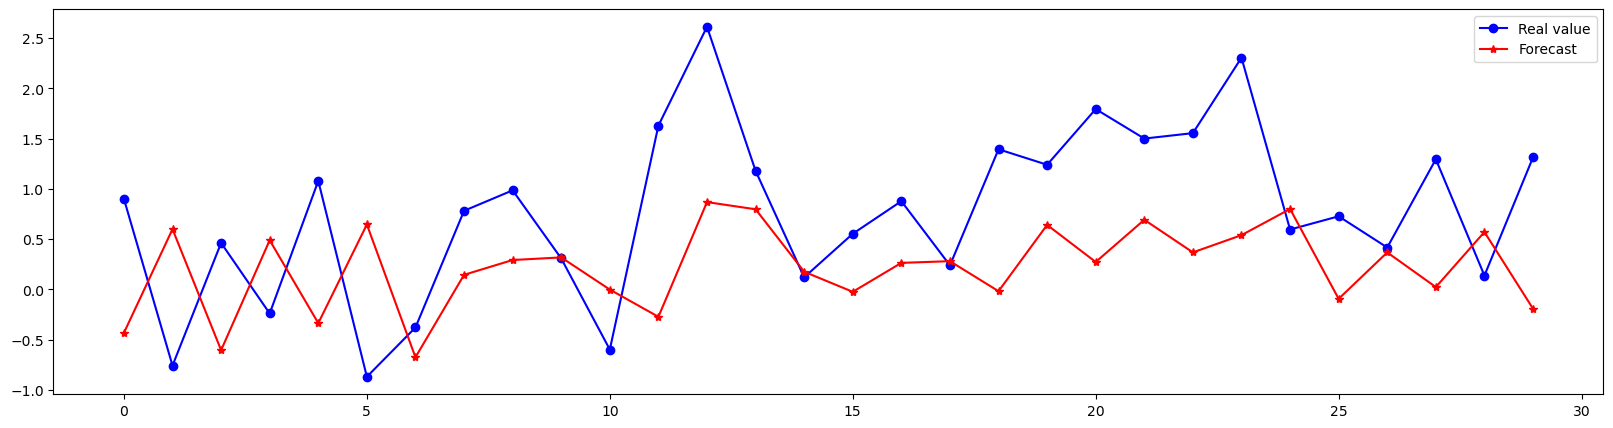

MAE = 0.885219699928507, RMSE = 1.0504608207846509


In [23]:
MAE, RMSE = ERROR_one_step_forecast_ma_est(ma1,30)
print(f'MAE = {MAE}, RMSE = {RMSE}')

# 3-(b)

In [24]:
def olse_ar_1(D):
    n = len(D)
    X = np.array(D)-np.mean(D)
    ln,ld = [],[]
    for t in range(1,n):
        ln.append(X[t]*X[t-1])
        ld.append(X[t-1]**2)
    olse = sum(ln)/sum(ld)
    hatp0 = np.mean(D)-(1-olse)
    return hatp0,olse

In [25]:
def ERROR_one_step_forecast_olse1(D,m):
    T = len(D)
    n = T - m
    Lr,Lf,Le = [],[],[]
    for i in range(m):
        INS = D[i:i+n]
        Real_one = D[i+n]
        mu = np.mean(INS)
        olse = olse_ar_1(INS)
        Xt = INS[-1]
        Fore_one = mu + olse[1]*(Xt-mu)
        Lr.append(Real_one)
        Lf.append(Fore_one)
        Le.append(Real_one - Fore_one)
    Le = np.array(Le)
    MAE = np.mean(np.abs(Le))
    RMSE = (np.mean(Le**2))**0.5
    plt.figure(figsize=(20,5))
    plt.plot(Lr, 'b', label = "Real value", marker = 'o')
    plt.plot(Lf, 'r', label = "Forecast", marker = '*')
    plt.legend()
    plt.show()
    return MAE, RMSE

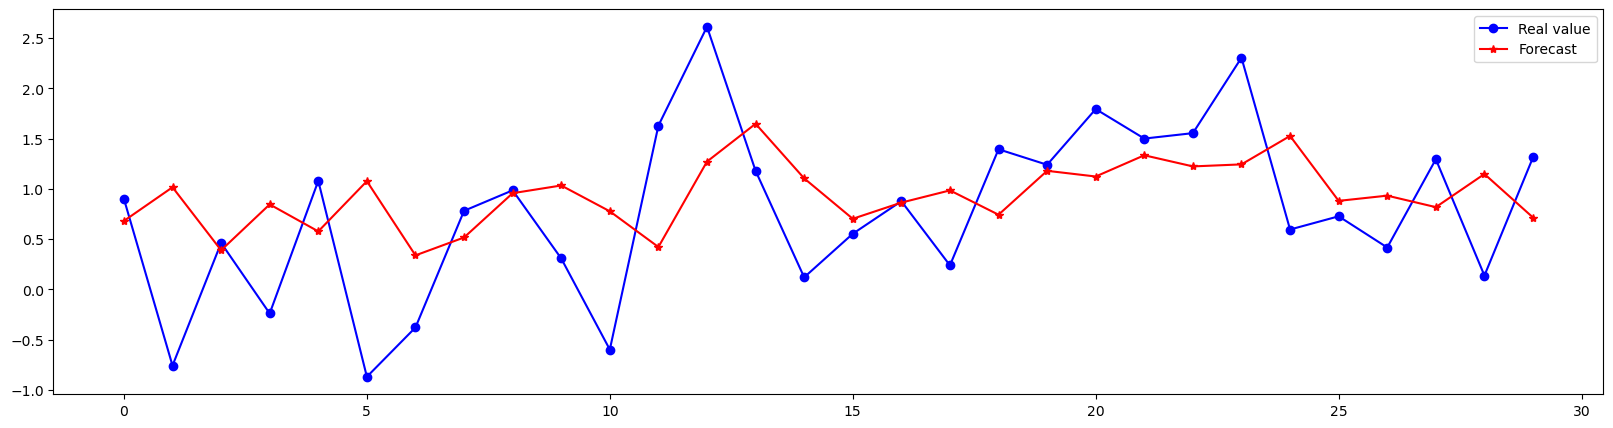

MAE = 0.6753024071081587, RMSE = 0.8440275998967791


In [26]:
MAE, RMSE = ERROR_one_step_forecast_olse1(ma1,30)
print(f'MAE = {MAE}, RMSE = {RMSE}')

# 4

In [27]:
n = len(Ar1)
x2 = sum(Ar1[1:])/(n-1)
x1 = sum(Ar1[:-1])/(n-1)

hat_phi = (sum(np.array(Ar1[1:])*np.array(Ar1[:-1]))-(n-1)*x1*x2)/(sum(np.array(Ar1[1:])**2)-(n-1)*x1**2)
hat_alpha = x2-hat_phi*x1
hat_mu = hat_alpha/(1-hat_phi)
hat_sig = sum(((np.array(Ar1[1:])-hat_mu)-hat_phi*(np.array(Ar1[:-1])-hat_mu))**2)/(n-1)

latex_str = f"""
\\begin{{align*}}
\\hat\\alpha & = {hat_alpha} \\\\
\\hat\\mu & = {hat_mu} \\\\
\\hat\\phi & = {hat_phi} \\\\
\\hat\\sigma^2 & = {hat_sig}
\\end{{align*}}
"""
display(Math(latex_str))

<IPython.core.display.Math object>

# 5

In [28]:
def mle_ar_1(D):
    n = len(D)
    x2 = sum(D[1:])/(n-1)
    x1 = sum(D[:-1])/(n-1)
    hat_phi = (sum(np.array(D[1:])*np.array(D[:-1]))-(n-1)*x1*x2)/(sum(np.array(D[1:])**2)-(n-1)*x1**2)
    return hat_phi

In [29]:
def ERROR_one_step_forecast(D,m):
    T = len(D)
    n = T - m
    Lr,Lf1,Lf2,Lf3,Le1,Le2,Le3 = [],[],[],[],[],[],[]
    for i in range(m):
        INS = D[i:i+n]
        Real_one = D[i+n] # one step
        mu = np.mean(INS)
        yw = yw_ar_1(INS)
        olse = olse_ar_1(INS)
        mle = mle_ar_1(INS)
        Xt = INS[-1]
        Fore_one1 = mu + olse[1]*(Xt-mu)
        Fore_one2 = mu + yw[1]*(Xt-mu)
        Fore_one3 = mu + mle*(Xt-mu)
        Lr.append(Real_one)
        Lf1.append(Fore_one1)
        Lf2.append(Fore_one2)
        Lf3.append(Fore_one3)
        Le1.append(Real_one - Fore_one1)
        Le2.append(Real_one - Fore_one2)
        Le3.append(Real_one - Fore_one3)
    Le1 = np.array(Le1)
    Le2 = np.array(Le2)
    Le3 = np.array(Le3)
    MAE1 = np.mean(np.abs(Le1))
    RMSE1 = (np.mean(Le1**2))**0.5
    MAE2 = np.mean(np.abs(Le2))
    RMSE2 = (np.mean(Le2**2))**0.5
    MAE3 = np.mean(np.abs(Le3))
    RMSE3 = (np.mean(Le3**2))**0.5
    plt.figure(figsize=(20,5))
    plt.plot(Lr, 'r', label = "Real value", marker = 'o')
    plt.plot(Lf1, 'g', label = "olse Forecast", marker = 'P')
    plt.plot(Lf2, 'b', label = "yw Forecast", marker = 'D')
    plt.plot(Lf3, 'y', label = "mle Forecast", marker = '*')
    plt.legend()
    plt.show()
    return MAE1, RMSE1, MAE2, RMSE2, MAE3, RMSE3

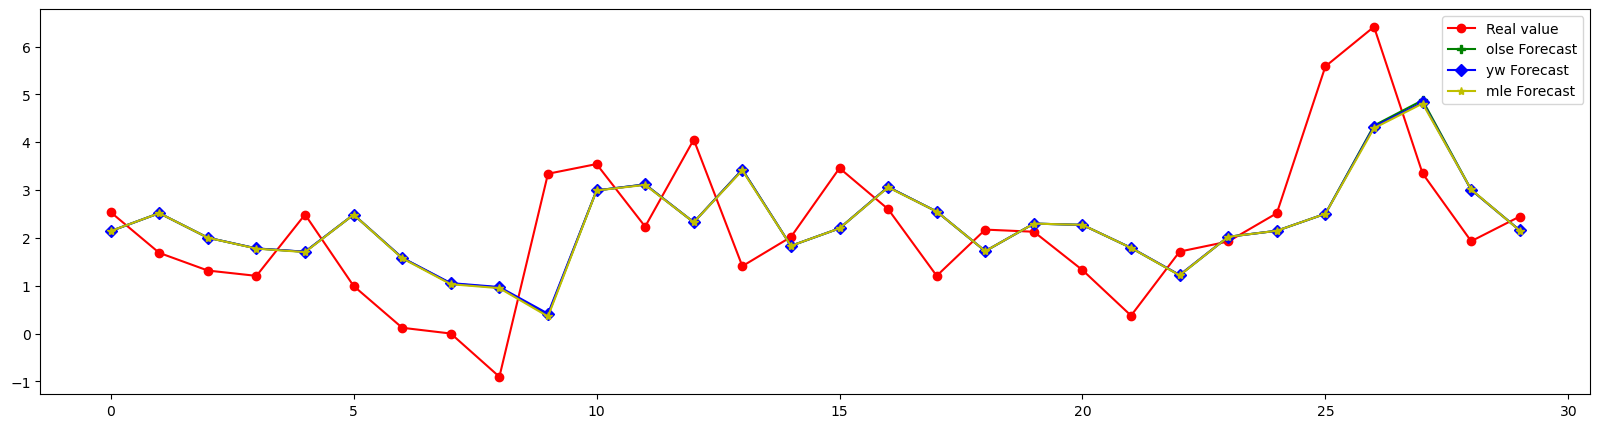

olse MAE = 1.0829774593129626, olse RMSE = 1.3233498896147362
yw MAE = 1.0815821077869143, yw RMSE = 1.3212244105126882
mle MAE = 1.081604885974996, mle RMSE = 1.3236074542679273


In [30]:
mae_olse, rmse_olse, mae_yw, rmse_yw, mae_mle, rmse_mle = ERROR_one_step_forecast(Ar1,30)

# 결과 출력
print(f"olse MAE = {mae_olse}, olse RMSE = {rmse_olse}")
print(f"yw MAE = {mae_yw}, yw RMSE = {rmse_yw}")
print(f"mle MAE = {mae_mle}, mle RMSE = {rmse_mle}")

5번 - 세 가지 추정법간의 유의미한 차이가 없어 보인다.

# 6

In [31]:
def ERROR_two_step_forecast(D,m):
    T = len(D)
    n = T - m - 1
    Lr,Lf1,Lf2,Lf3,Le1,Le2,Le3 = [],[],[],[],[],[],[]
    for i in range(m):
        INS = D[i:i+n]
        Real_one = D[i+n+1] # two step
        mu = np.mean(INS)
        yw = yw_ar_1(INS)
        olse = olse_ar_1(INS)
        mle = mle_ar_1(INS)
        Xt = INS[-1]
        Fore_one1 = mu + olse[1]**2*(Xt-mu)
        Fore_one2 = mu + yw[1]**2*(Xt-mu)
        Fore_one3 = mu + mle**2*(Xt-mu)
        Lr.append(Real_one)
        Lf1.append(Fore_one1)
        Lf2.append(Fore_one2)
        Lf3.append(Fore_one3)
        Le1.append(Real_one - Fore_one1)
        Le2.append(Real_one - Fore_one2)
        Le3.append(Real_one - Fore_one3)
    Le1 = np.array(Le1)
    Le2 = np.array(Le2)
    Le3 = np.array(Le3)
    MAE1 = np.mean(np.abs(Le1))
    RMSE1 = (np.mean(Le1**2))**0.5
    MAE2 = np.mean(np.abs(Le2))
    RMSE2 = (np.mean(Le2**2))**0.5
    MAE3 = np.mean(np.abs(Le3))
    RMSE3 = (np.mean(Le3**2))**0.5
    plt.figure(figsize=(20,5))
    plt.plot(Lr, 'r', label = "Real value", marker = 'o')
    plt.plot(Lf1, 'g', label = "olse Forecast", marker = 'P')
    plt.plot(Lf2, 'b', label = "yw Forecast", marker = 'D')
    plt.plot(Lf3, 'y', label = "mle Forecast", marker = '*')
    plt.legend()
    plt.show()
    return MAE1, RMSE1, MAE2, RMSE2, MAE3, RMSE3

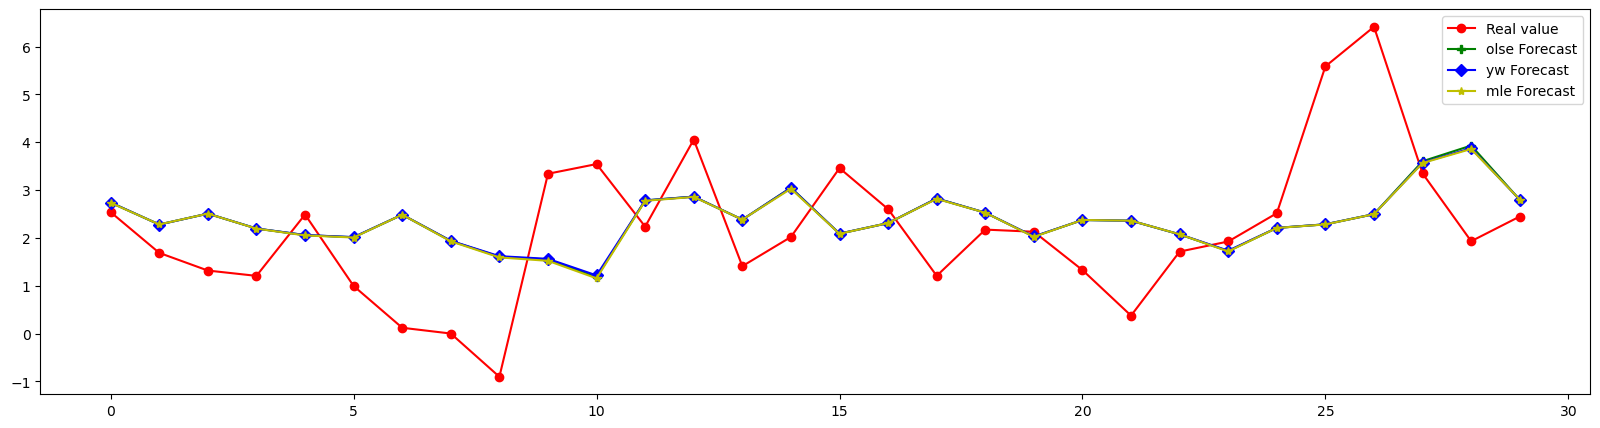

olse MAE = 1.2194033073528534, olse RMSE = 1.5555525945989486
yw MAE = 1.21494947192557, yw RMSE = 1.5513257806701628
mle MAE = 1.2163705130918119, mle RMSE = 1.5532138192590352


In [32]:
mae_olse, rmse_olse, mae_yw, rmse_yw, mae_mle, rmse_mle = ERROR_two_step_forecast(Ar1,30)

# 결과 출력
print(f"olse MAE = {mae_olse}, olse RMSE = {rmse_olse}")
print(f"yw MAE = {mae_yw}, yw RMSE = {rmse_yw}")
print(f"mle MAE = {mae_mle}, mle RMSE = {rmse_mle}")

6번 - 세 가지 추정법간의 유의미한 차이가 없어 보인다.